In [1]:
random_state = 42 # notebook consistency

from typing import List
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from umap import UMAP
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture

## Load data
cwd = os.getcwd()
os.chdir('..')
df = pd.read_csv('BRCA_data.csv')

os.chdir(cwd)

sample_name = df.iloc[:,0].copy()    # sample index
X = df.iloc[:,1:354].copy()          # X : gene expression features
y = df.iloc[:,354:].copy()           # y : clinical labels

Text(0, 0.5, 'Embedding 2')

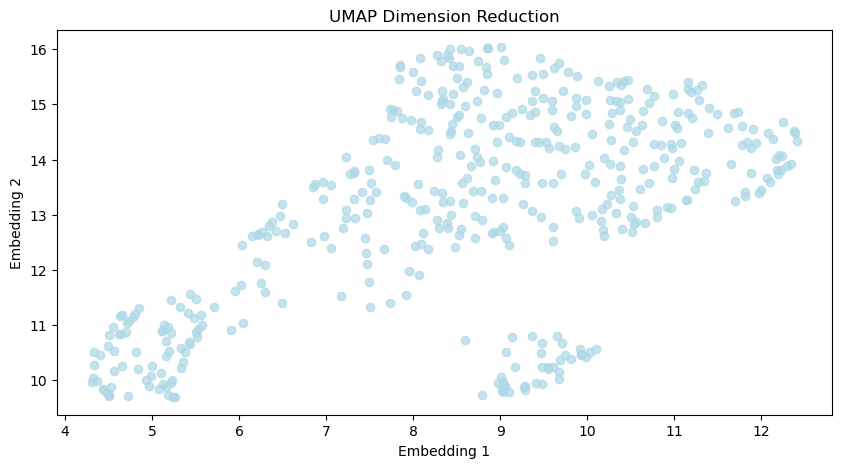

In [6]:
umap_model = UMAP(
    n_neighbors=10,
    n_components=2,
    min_dist=0.1,
    metric="euclidean",
    random_state=random_state,
    n_jobs=1
)
X_umap = make_pipeline(umap_model).fit_transform(X)
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(X_umap[:,0],X_umap[:,1], color='lightblue', alpha=0.7)
ax.set_title('UMAP Dimension Reduction')
ax.set_xlabel('Embedding 1')
ax.set_ylabel('Embedding 2')

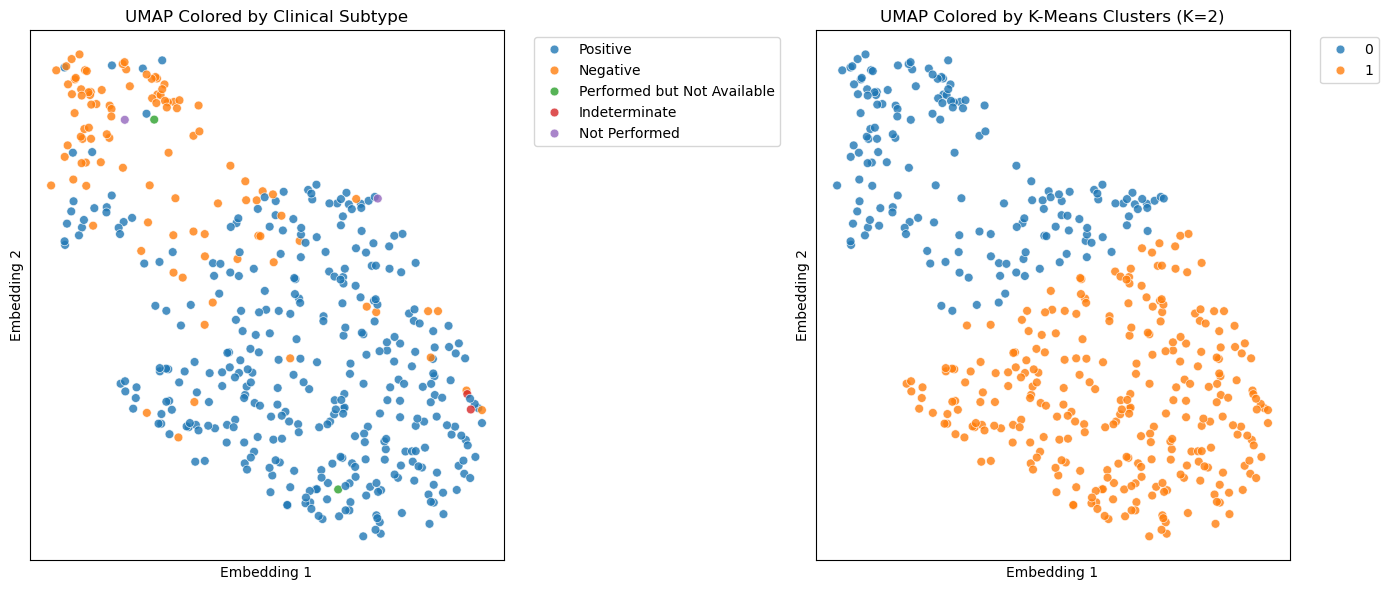


Cluster–Subtype Alignment (row-normalized):


Cluster,0,1
Subtype,,
Indeterminate,0.000000,1.000000
Negative,0.880000,0.120000
Not Performed,1.000000,0.000000
Performed but Not Available,0.500000,0.500000
Positive,0.212389,0.787611


In [ ]:


# --- refit clustering using best K ---
best_k = 2  # or 4 depending on prior analysis
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_umap)

# --- prepare DataFrame for visualization ---
plot_df = pd.DataFrame({
    "Embedding 1": X_umap[:, 0],
    "Embedding 2": X_umap[:, 1],
    "Cluster": cluster_labels,
    "Subtype": y["ER-Status"].values
})

# --- create side-by-side scatterplots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# left: ground-truth subtypes
sns.scatterplot(
    data=plot_df, x="Embedding 1", y="Embedding 2",
    hue="Subtype", palette="tab10", s=40, alpha=0.8, ax=axes[0]
)
axes[0].set_title("UMAP Colored by Clinical Subtype")
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticks([]); axes[0].set_yticks([])

# right: fitted clustering labels
sns.scatterplot(
    data=plot_df, x="Embedding 1", y="Embedding 2",
    hue="Cluster", palette="tab10", s=40, alpha=0.8, ax=axes[1]
)
axes[1].set_title(f"UMAP Colored by K-Means Clusters (K={best_k})")
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticks([]); axes[1].set_yticks([])

plt.tight_layout()
plt.show()

# --- optional: contingency table to quantify alignment ---
ct = pd.crosstab(plot_df["Subtype"], plot_df["Cluster"], normalize='index')
print("\nCluster–Subtype Alignment (row-normalized):")
display(ct.style.background_gradient(cmap="Blues"))


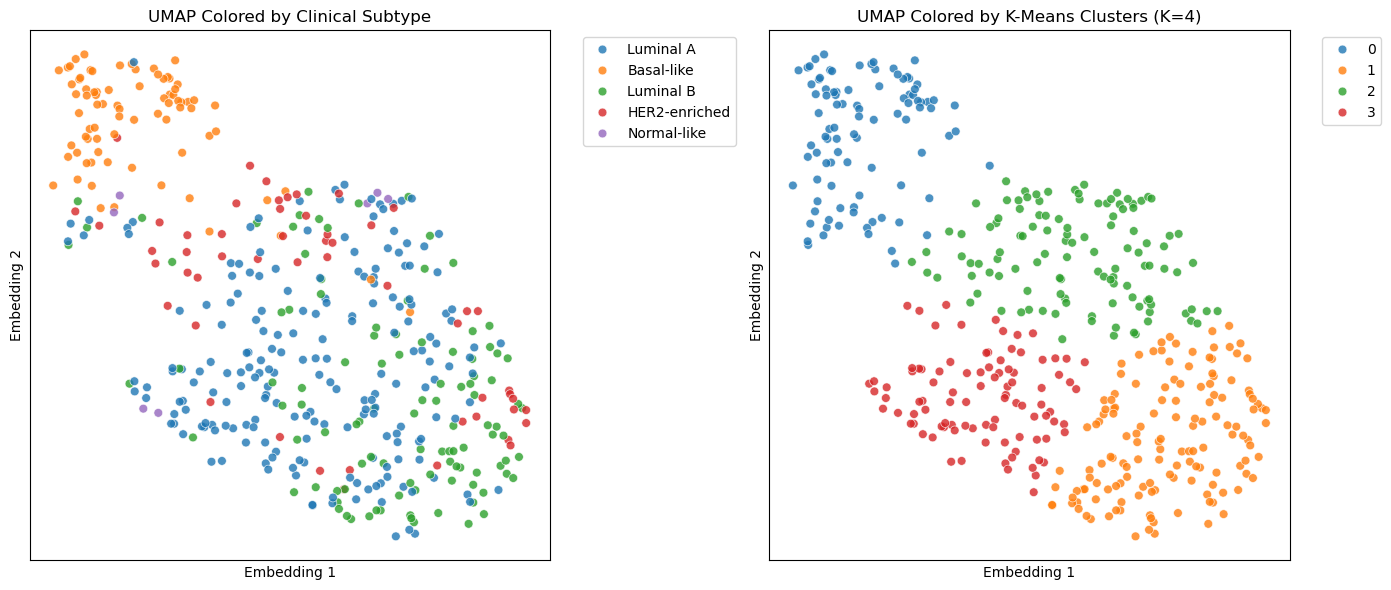


Cluster–Subtype Alignment (row-normalized):


Cluster,0,1,2,3
Subtype,,,,
Basal-like,0.924051,0.000000,0.075949,0.000000
HER2-enriched,0.150943,0.283019,0.490566,0.075472
Luminal A,0.040000,0.280000,0.295000,0.385000
Luminal B,0.037736,0.660377,0.198113,0.103774
Normal-like,0.285714,0.000000,0.428571,0.285714


In [ ]:



# --- refit clustering using best K ---
best_k = 4  # or 4 depending on prior analysis
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_umap)

# --- prepare DataFrame for visualization ---
plot_df = pd.DataFrame({
    "Embedding 1": X_umap[:, 0],
    "Embedding 2": X_umap[:, 1],
    "Cluster": cluster_labels,
    "Subtype": y["Subtype"].values
})

# --- create side-by-side scatterplots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# left: ground-truth subtypes
sns.scatterplot(
    data=plot_df, x="Embedding 1", y="Embedding 2",
    hue="Subtype", palette="tab10", s=40, alpha=0.8, ax=axes[0]
)
axes[0].set_title("UMAP Colored by Clinical Subtype")
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticks([]); axes[0].set_yticks([])

# right: fitted clustering labels
sns.scatterplot(
    data=plot_df, x="Embedding 1", y="Embedding 2",
    hue="Cluster", palette="tab10", s=40, alpha=0.8, ax=axes[1]
)
axes[1].set_title(f"UMAP Colored by K-Means Clusters (K={best_k})")
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticks([]); axes[1].set_yticks([])

plt.tight_layout()
plt.show()

# --- optional: contingency table to quantify alignment ---
ct = pd.crosstab(plot_df["Subtype"], plot_df["Cluster"], normalize='index')
print("\nCluster–Subtype Alignment (row-normalized):")
display(ct.style.background_gradient(cmap="Blues"))


In [34]:
y['Subtype'].unique()

array(['Luminal A', 'Basal-like', 'Luminal B', 'HER2-enriched',
       'Normal-like'], dtype=object)